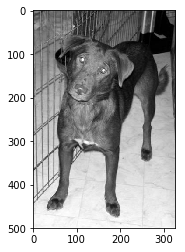

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "/home/al-akhir/Downloads/Documents/"
CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!
        break  # we just want one for now so break
    break  #...and one more!

In [3]:
print(img_array)

[[255 211 199 ... 201 208 210]
 [222 157 125 ... 107 106 104]
 [237 157 110 ...  93  88  86]
 ...
 [254 251 248 ... 238 238 240]
 [254 253 251 ... 244 244 245]
 [253 253 253 ... 249 248 249]]


In [4]:
print(img_array.shape)

(500, 327)


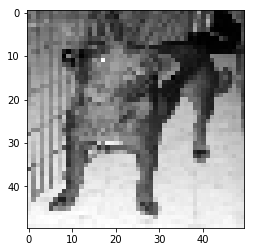

In [5]:
#resizing Image
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [6]:
training_data = []
#converting dog,cat to 0 and 1
def create_training_data():
    for category in CATEGORIES:  # do dogs and cats
        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat
        for img in os.listdir(path):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
create_training_data()

In [7]:
print(len(training_data))


9


In [8]:
import random

random.shuffle(training_data)

In [9]:
for sample in training_data:
    print(sample[1])

1
0
1
1
0
0
0
1
0


In [22]:
X = []
y = []

In [23]:

for features,label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

[[[[ 44]
   [ 60]
   [ 41]
   ...
   [ 95]
   [ 94]
   [197]]

  [[ 41]
   [ 43]
   [ 43]
   ...
   [ 93]
   [ 80]
   [192]]

  [[ 41]
   [ 40]
   [ 46]
   ...
   [ 90]
   [ 86]
   [193]]

  ...

  [[ 25]
   [ 21]
   [ 26]
   ...
   [ 43]
   [ 67]
   [ 73]]

  [[ 21]
   [ 23]
   [ 21]
   ...
   [ 74]
   [ 36]
   [ 89]]

  [[ 23]
   [ 22]
   [ 20]
   ...
   [ 59]
   [ 62]
   [ 32]]]]


In [24]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [25]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [26]:
X[1]

array([[[115],
        [160],
        [159],
        ...,
        [157],
        [148],
        [139]],

       [[121],
        [164],
        [166],
        ...,
        [163],
        [153],
        [146]],

       [[124],
        [161],
        [164],
        ...,
        [168],
        [161],
        [151]],

       ...,

       [[155],
        [128],
        [ 88],
        ...,
        [ 81],
        [ 69],
        [ 68]],

       [[ 87],
        [ 95],
        [ 72],
        ...,
        [ 77],
        [ 74],
        [ 73]],

       [[ 75],
        [ 78],
        [ 79],
        ...,
        [ 75],
        [ 78],
        [ 75]]], dtype=uint8)